<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/TemperaturePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
 df.drop('station',axis=1,inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
##checking null values

In [7]:
df.isnull().sum()

Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df.dtypes

Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [9]:
for i in df.columns:
  if df[i].dtype == 'float64':
    df[i] = df[i].fillna(df[i].mean())

In [10]:
df.isnull().sum()

Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
df['Date'] = df['Date'].drop(7750,axis=0)
df['Date'] = df['Date'].drop(7751,axis=0)

In [12]:
df['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750          NaT
7751          NaT
Name: Date, Length: 7752, dtype: datetime64[ns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c9705a250>,
      dtype=object)

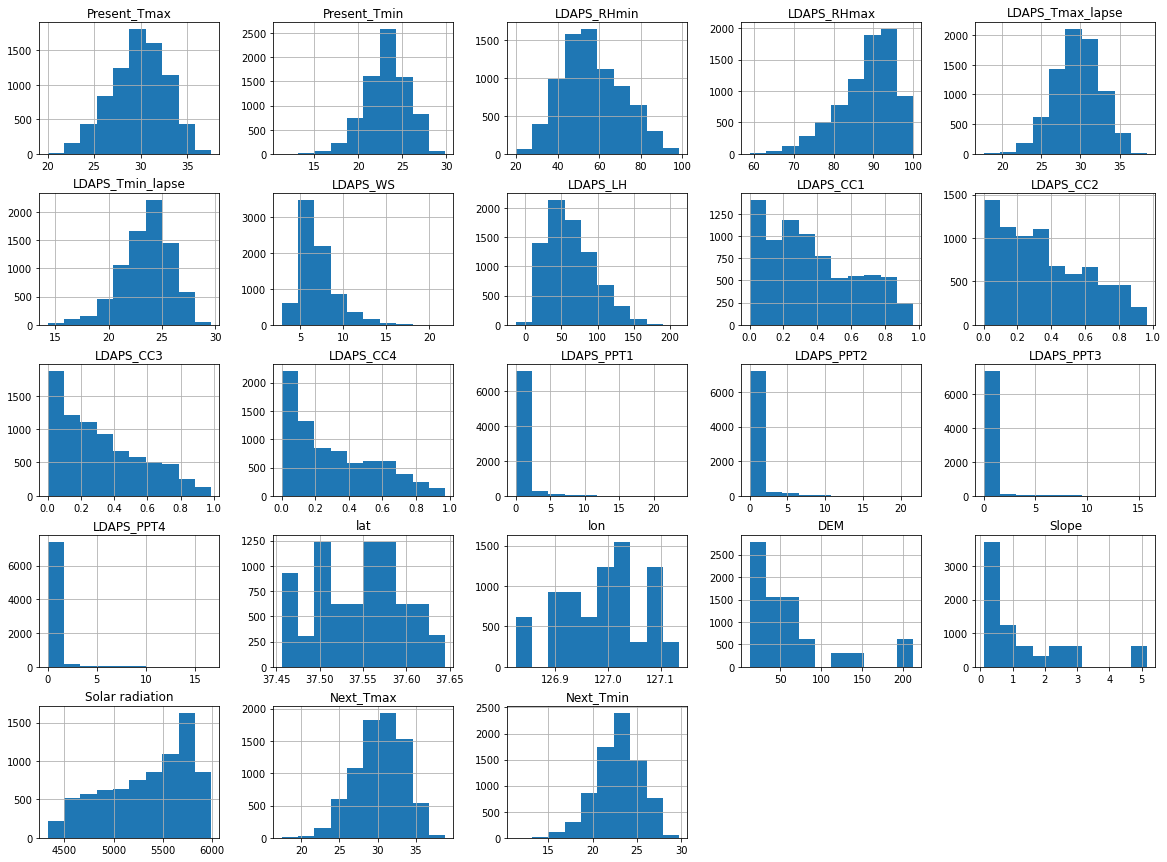

In [13]:
df.hist(figsize=(20,15))

In [14]:
##handling outliers

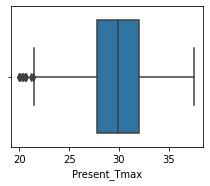

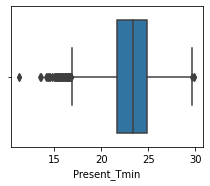

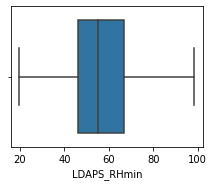

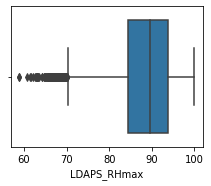

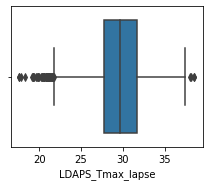

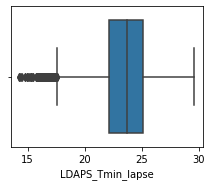

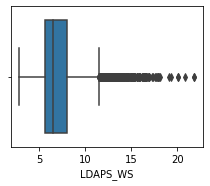

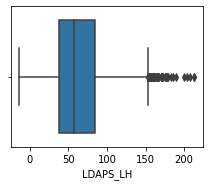

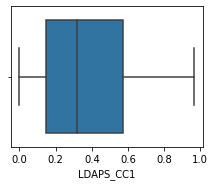

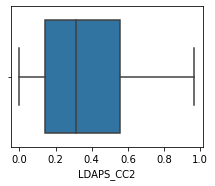

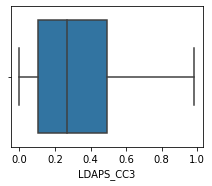

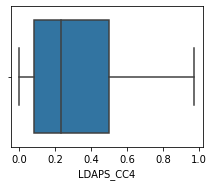

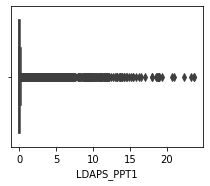

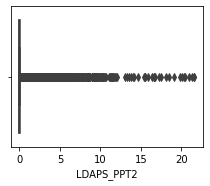

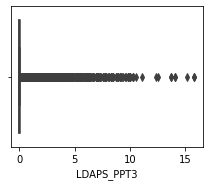

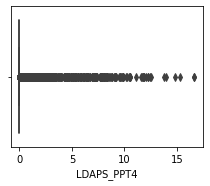

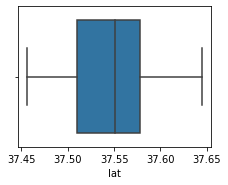

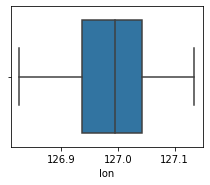

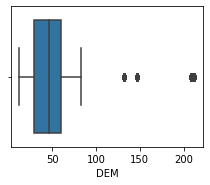

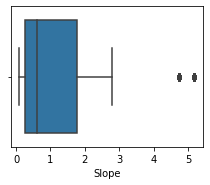

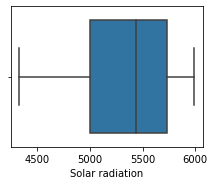

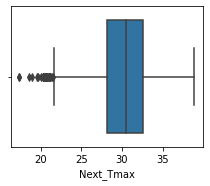

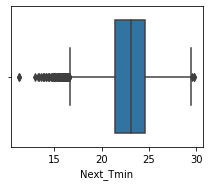

In [15]:
cols=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
for i in cols:
    plt.figure(figsize=(20,15))
    plt.subplot(5,5,5)
    sns.boxplot(df[i])

In [16]:
df.columns

Index(['Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [17]:
df2 = df[df['Present_Tmax']>22]
df2 = df[df['Present_Tmin']>17]
df2 = df[df['LDAPS_RHmax']>70]
df2 = df[df['LDAPS_Tmax_lapse']>22]
df2 = df[df['LDAPS_Tmin_lapse']>18]
df2 = df[df['LDAPS_WS']<15]
df2 = df[df['LDAPS_LH']<160]
df2 = df[df['LDAPS_PPT1']<15]
df2 = df[df['LDAPS_PPT2']<15]
df2 = df[df['LDAPS_PPT3']<10]
df2 = df[df['LDAPS_PPT4']<12]
df2 = df[df['DEM']<100]
df2 = df[df['Slope']<4]
df2 = df[df['Next_Tmax']>22]
df2 = df[df['Next_Tmin']>17]

In [18]:
df2.shape , df.shape

((7614, 24), (7752, 24))

In [19]:
##outliers are removed

In [20]:
df2 = df2.reset_index(drop=True)

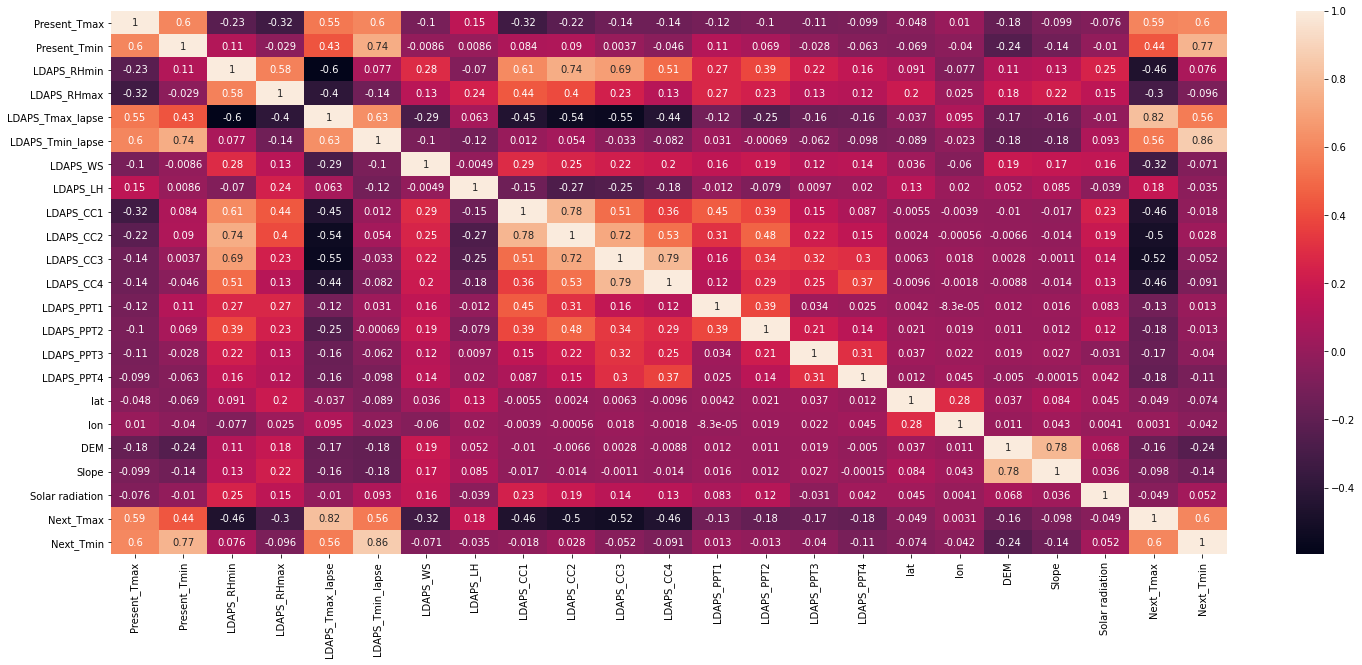

In [21]:
plt.figure(figsize=(25,10))
sns.heatmap(df2.corr(),annot=True)

In [22]:
def correlation(dataset, threshold):
    col_corr = set()             # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
correlation(df2,0.7)

{'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_Tmin_lapse',
 'Next_Tmax',
 'Next_Tmin',
 'Slope'}

In [24]:
## dropping 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','Slope' as they are highly correlated with each other

In [25]:
df2.drop(['LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','Slope'],axis=1,inplace=True)

In [26]:
df2.drop('Date',axis=1,inplace=True)

In [27]:
# checking skewnss
from scipy.stats import skew

skewness value of Present_Tmax  : -0.24098357063056958




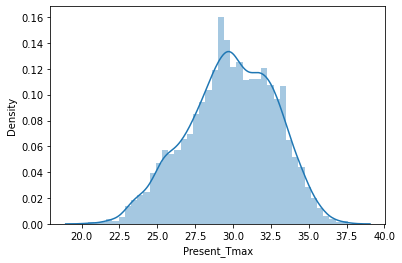

skewness value of Present_Tmin  : -0.20629939361728114




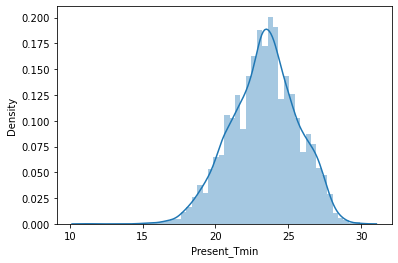

skewness value of LDAPS_RHmin  : 0.29773233814333827




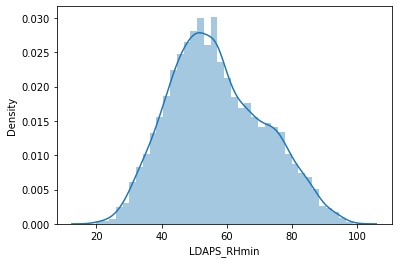

skewness value of LDAPS_RHmax  : -0.8574842382111495




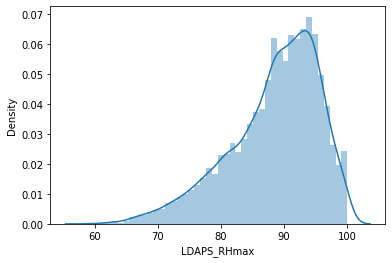

skewness value of LDAPS_Tmax_lapse  : -0.1076858236810475




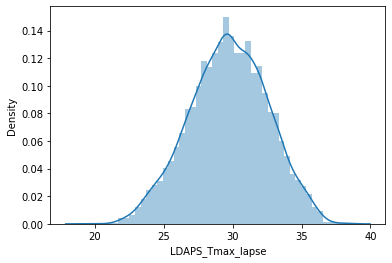

skewness value of LDAPS_Tmin_lapse  : -0.3600612531454311




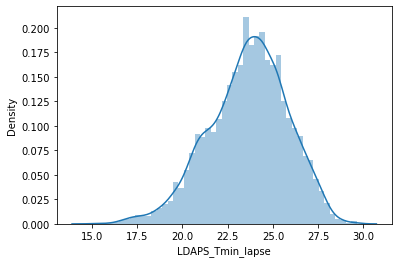

skewness value of LDAPS_WS  : 1.5514442525033252




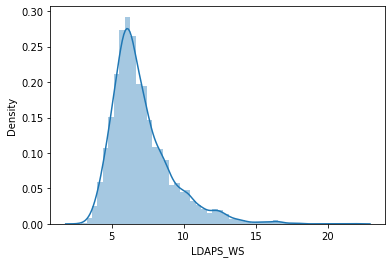

skewness value of LDAPS_LH  : 0.6886522642808244




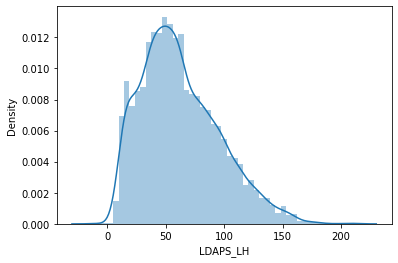

skewness value of LDAPS_CC1  : 0.4658043722754464




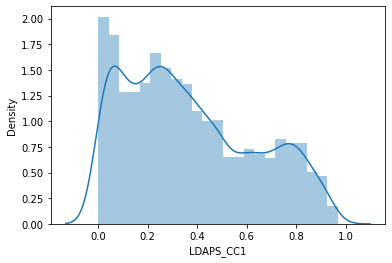

skewness value of LDAPS_PPT1  : 5.365481957320683




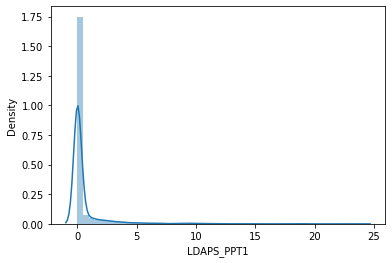

skewness value of LDAPS_PPT2  : 5.751582674507445




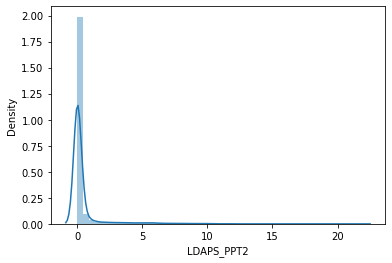

skewness value of LDAPS_PPT3  : 6.746850574579616




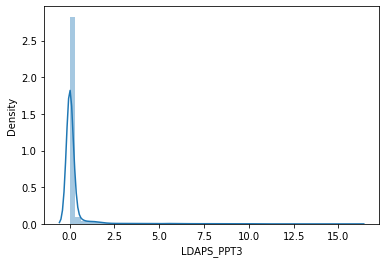

skewness value of LDAPS_PPT4  : 6.8326003367955055




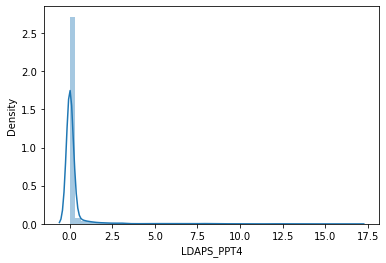

skewness value of lat  : 0.10095228133568539




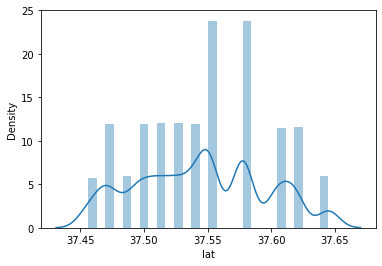

skewness value of lon  : -0.2833817376274332




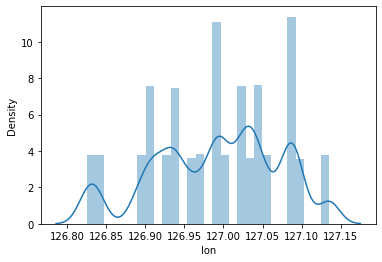

skewness value of DEM  : 1.7444243606366125




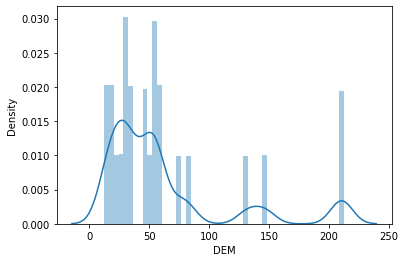

skewness value of Solar radiation  : -0.5197509376145844




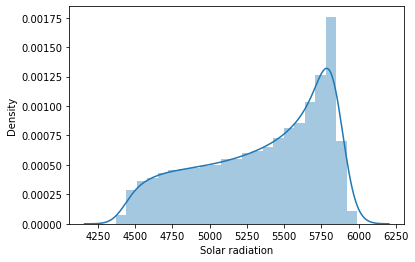

skewness value of Next_Tmax  : -0.25978686757597996




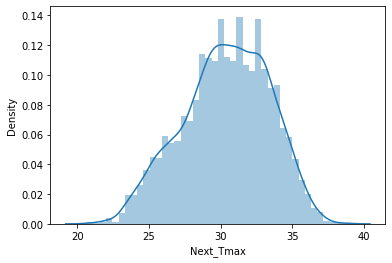

skewness value of Next_Tmin  : -0.12539026418155821




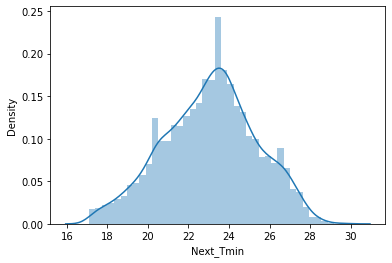

In [28]:
for i in df2.columns:
  print('skewness value of',i,' :',skew(df2[i]))
  print('\n')
  plt.figure()
  sns.distplot(df2[i])
  plt.show()

In [40]:
#there is skewness present in LDAPS_Tmax_lapse and LDAPS_Tmin_lapse..but they are highly correlated with target variable ..so no need to remove skewness

In [61]:
df3 = df2.copy()

In [62]:
df3['LDAPS_WS'] = np.sqrt(df3['LDAPS_WS'])
df3['LDAPS_LH'] = np.sqrt(df3['LDAPS_LH'])
df3['LDAPS_PPT1'] = np.sqrt(df3['LDAPS_PPT1'])
df3['LDAPS_PPT2'] = np.sqrt(df3['LDAPS_PPT2'])
df3['LDAPS_PPT3'] = np.sqrt(df3['LDAPS_PPT3'])
df3['LDAPS_PPT4'] = np.sqrt(df3['LDAPS_PPT4'])
df3['DEM'] = np.sqrt(df3['DEM'])


In [63]:
df3.skew()

Present_Tmax       -0.241031
Present_Tmin       -0.206340
LDAPS_RHmin         0.297791
LDAPS_RHmax        -0.857653
LDAPS_Tmax_lapse   -0.107707
LDAPS_Tmin_lapse   -0.360132
LDAPS_WS            1.022539
LDAPS_LH            0.055218
LDAPS_CC1           0.465896
LDAPS_PPT1          2.710579
LDAPS_PPT2          3.106601
LDAPS_PPT3          3.716683
LDAPS_PPT4          3.961233
lat                 0.100972
lon                -0.283438
DEM                 1.164466
Solar radiation    -0.519853
Next_Tmax          -0.259838
Next_Tmin          -0.125415
dtype: float64

In [38]:
#df3['LDAPS_PPT1'] = np.log1p(df3['LDAPS_PPT1'])
#df3['LDAPS_PPT2'] = np.log1p(df3['LDAPS_PPT2'])
#df3['LDAPS_PPT3'] = np.log1p(df3['LDAPS_PPT3'])
#df3['LDAPS_PPT4'] = np.log1p(df3['LDAPS_PPT4'])
#df3['DEM'] = np.log1p(df3['DEM'])

In [64]:
#df3.skew()

In [41]:
#df3['LDAPS_PPT1'] = np.cbrt(df3['LDAPS_PPT1'])
#df3['LDAPS_PPT2'] = np.cbrt(df3['LDAPS_PPT2'])
#df3['LDAPS_PPT3'] = np.cbrt(df3['LDAPS_PPT3'])
#df3['LDAPS_PPT4'] = np.cbrt(df3['LDAPS_PPT4'])
#df3['DEM'] = np.cbrt(df3['DEM'])

In [65]:
#df3.skew()

In [44]:
## skewness is improved alot

skewness value of Present_Tmax  : -0.24098357063056958




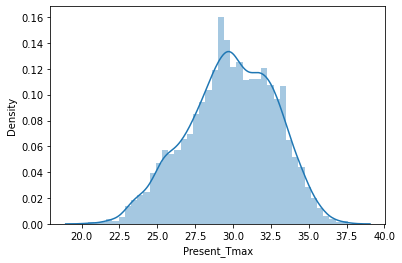

skewness value of Present_Tmin  : -0.20629939361728114




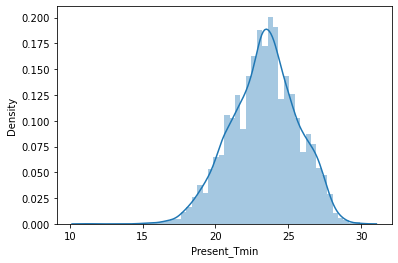

skewness value of LDAPS_RHmin  : 0.29773233814333827




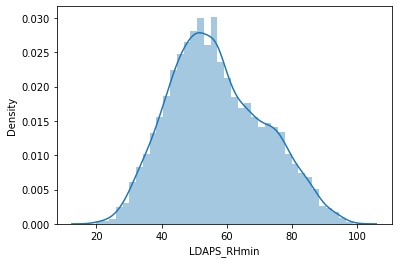

skewness value of LDAPS_RHmax  : -0.8574842382111495




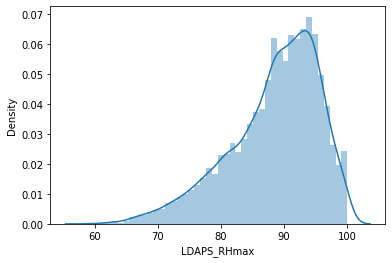

skewness value of LDAPS_Tmax_lapse  : -0.1076858236810475




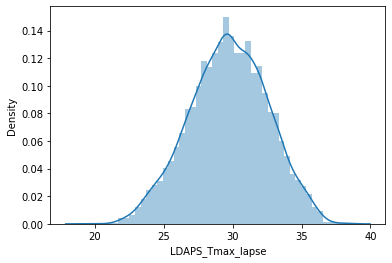

skewness value of LDAPS_Tmin_lapse  : -0.3600612531454311




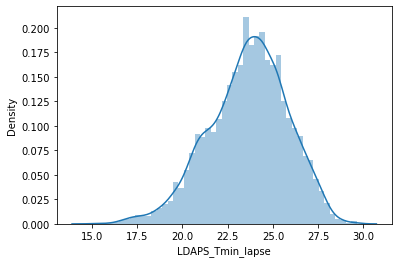

skewness value of LDAPS_WS  : 1.022337296660218




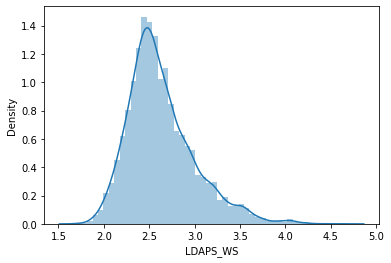

skewness value of LDAPS_LH  : nan




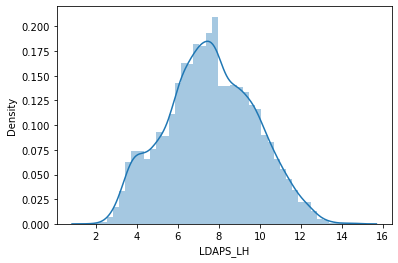

skewness value of LDAPS_CC1  : 0.4658043722754464




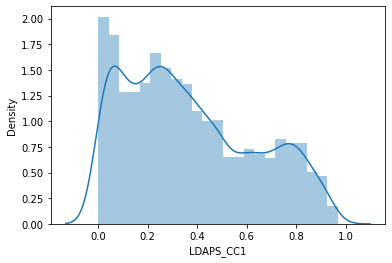

skewness value of LDAPS_PPT1  : 2.7100453179617476




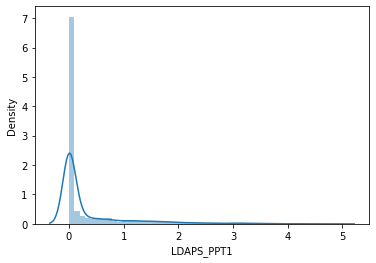

skewness value of LDAPS_PPT2  : 3.105989155232244




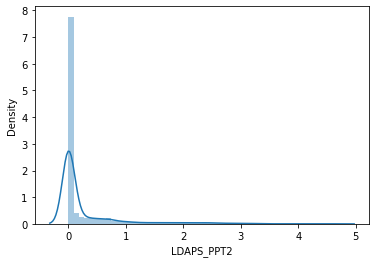

skewness value of LDAPS_PPT3  : 3.7159510714191932




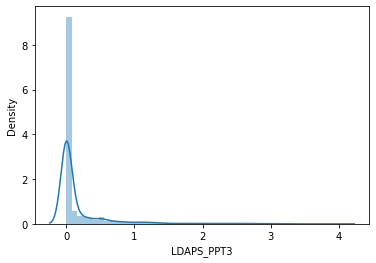

skewness value of LDAPS_PPT4  : 3.9604529866097815




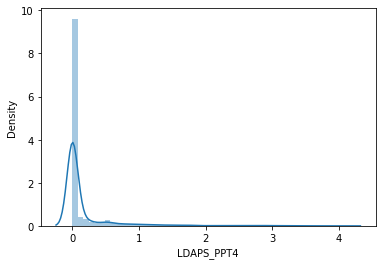

skewness value of lat  : 0.10095228133568539




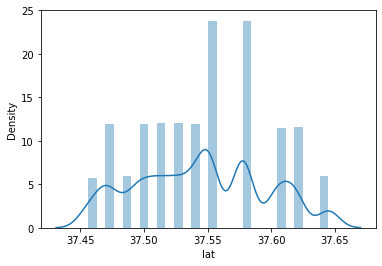

skewness value of lon  : -0.2833817376274332




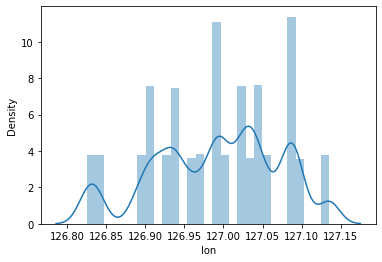

skewness value of DEM  : 1.1642364257113114




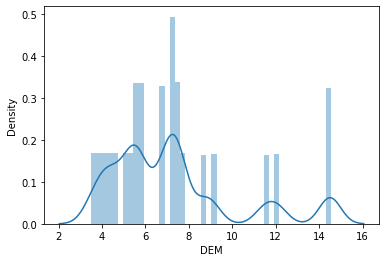

skewness value of Solar radiation  : -0.5197509376145844




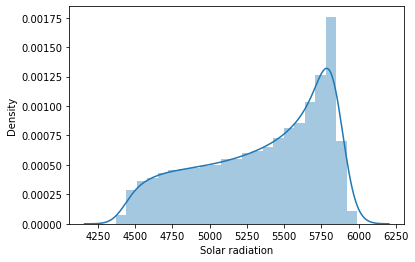

skewness value of Next_Tmax  : -0.25978686757597996




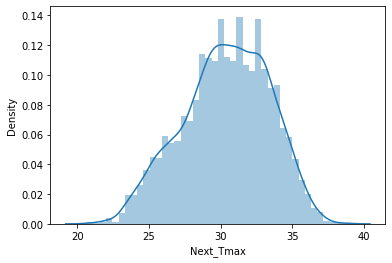

skewness value of Next_Tmin  : -0.12539026418155821




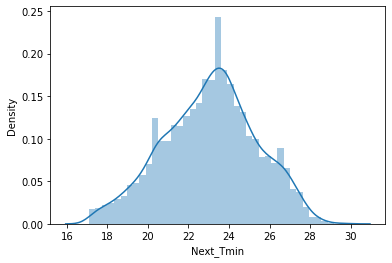

In [66]:
for i in df3.columns:
  print('skewness value of',i,' :',skew(df3[i]))
  print('\n')
  plt.figure()
  sns.distplot(df3[i])
  plt.show()

In [67]:
df3.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            3
LDAPS_CC1           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [68]:
df3['LDAPS_LH'].dropna(inplace=True)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df4=pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
df4.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Solar radiation,Next_Tmax,Next_Tmin
0,-0.398653,-0.843030,0.094795,0.378992,-0.575354,-0.284191,-0.118853,0.215442,-0.518944,-0.307219,-0.275601,-0.234668,-0.221872,1.199955,-0.002323,2.806695,1.525415,-0.419538,-0.804642
1,0.706551,-0.755555,-0.319049,0.307348,0.050320,0.186936,-0.650125,-0.307073,-0.551341,-0.307219,-0.275601,-0.234668,-0.221872,1.199955,0.513128,-0.307480,1.231041,0.042079,-0.242199
2,0.602938,-0.012024,-0.565804,-0.621190,0.135055,0.430101,-0.439721,-1.242785,-0.613393,-0.307219,-0.275601,-0.234668,-0.221872,0.661407,0.839999,-0.520371,1.217328,0.239914,0.363508
3,0.741089,0.031713,0.093697,1.130562,-0.001119,-0.137895,-0.669848,0.104322,-0.586413,-0.307219,-0.275601,-0.234668,-0.221872,2.005782,0.387408,-0.289758,1.201629,0.437750,0.536567
4,0.533863,-0.624344,-0.048965,0.244393,-0.209148,-0.064434,-0.629801,1.364444,-0.835801,-0.307219,-0.275601,-0.234668,-0.221872,0.124854,1.808041,-0.488198,1.207792,0.272887,-0.242199


In [75]:
x=df4.drop(['Next_Tmax','Next_Tmin'], axis=1)
x.shape

(7614, 17)

In [76]:
y1=pd.DataFrame(df4['Next_Tmax'])
y2=pd.DataFrame(df4['Next_Tmin'])
print(y1.shape)
print(y2.shape)

(7614, 1)
(7614, 1)


In [101]:
## modelling for target variable Next_Tmax

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y1):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y1)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y1,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [78]:
lr=LinearRegression()
max_r2_score(lr,x,y1)

The maximum r2 score 0.7631392057536448 is achieved at random state 100


In [79]:
train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=100,test_size=0.20)


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y1)
gdk.best_params_

{'n_neighbors': 10}

In [81]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y1)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [82]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y1)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [83]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y1)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y1,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y1,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y1,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.7631392057536448
The cross val score is 0.6701907128305209
The mean squared error is 0.25532455625313627
The root mean squared error is 0.5052965033058672




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.8248934095790024
The cross val score is 0.5810026915605404
The mean squared error is 0.18875649150166973
The root mean squared error is 0.4344611507392459




DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_

In [84]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.763139,0.670191,0.255325,0.505297
1,KNeighborsRegressor,0.824893,0.581003,0.188756,0.434461
2,DecisionTreeRegressor,0.723278,0.381608,0.298293,0.546162
3,SVR,0.890236,0.568280,0.118320,0.343977


In [85]:
## linear reg is performing better

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [88]:
##trying ensemble techniques

In [89]:
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y1)
gdrf.best_params_

{'n_estimators': 500}

In [90]:
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y1)

The maximum r2 score 0.8954272733183662 is achieved at random state 73


In [91]:
cross=cross_val_score(rf,x,y1,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6795000451581672


In [92]:
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y1)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [93]:
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y1)

The maximum r2 score 0.8860518033250868 is achieved at random state 73


In [94]:
cross=cross_val_score(gb,x,y1,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6635355072175718


In [95]:
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y1)
gad.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [96]:
ad=AdaBoostRegressor(n_estimators=100,learning_rate=0.1)
max_r2_score(ad,x,y1)

The maximum r2 score 0.7309676579432278 is achieved at random state 73


In [97]:
cross=cross_val_score(ad,x,y1,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6338649431250183


In [98]:
result_boosters=pd.DataFrame({'Boosters':['RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.89,0.88,0.73],'Cross_val_score':[0.68,0.66,0.63]})
result_boosters

,Boosters,R2 Score,Cross_val_score
0,RandomForestRegressor,0.89,0.68
1,GradientBoostRegressor,0.88,0.66
2,AdaBoostRegressor,0.73,0.63


In [99]:
## the best performing model is random forest

In [100]:
import joblib 
joblib.dump(rf,'TempPred1.pkl')

['TempPred1.pkl']

In [102]:
## modelling for target variable Next_Tmin

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y2):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y2)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y2,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [104]:
lr=LinearRegression()
max_r2_score(lr,x,y2)

The maximum r2 score 0.8220853191883142 is achieved at random state 100


In [105]:
train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=100,test_size=0.20)

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y2)
gdk.best_params_

{'n_neighbors': 10}

In [107]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y2)
gdd.best_params_

{'criterion': 'mse'}

In [108]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y2)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [109]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y2)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y2,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y2,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y2,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.8220853191883142
The cross val score is 0.7504434938176361
The mean squared error is 0.18290189612205113
The root mean squared error is 0.4276703124160609




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.8513482443988696
The cross val score is 0.6510861245965649
The mean squared error is 0.1528186872341154
The root mean squared error is 0.3909203080349183




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None

In [110]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.822085,0.750443,0.182902,0.427670
1,KNeighborsRegressor,0.851348,0.651086,0.152819,0.390920
2,DecisionTreeRegressor,0.748569,0.497735,0.258479,0.508408
3,SVR,0.909012,0.644909,0.093539,0.305842


In [111]:
## linear reg is working good

In [113]:
## ensemble techniques

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [115]:
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500,600)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y2)
gdrf.best_params_

{'n_estimators': 600}

In [116]:
rf=RandomForestRegressor(n_estimators=600)
max_r2_score(rf,x,y2)

The maximum r2 score 0.8984616498997992 is achieved at random state 67


In [117]:
cross=cross_val_score(rf,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.7460905040780904


In [118]:
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y2)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [119]:
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y2)

The maximum r2 score 0.9128087860879175 is achieved at random state 85


In [120]:
cross=cross_val_score(gb,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.7533890373286368


In [121]:
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y2)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [122]:
ad=AdaBoostRegressor(n_estimators=100,learning_rate=1)
max_r2_score(ad,x,y2)

The maximum r2 score 0.7917672494755648 is achieved at random state 71


In [123]:
cross=cross_val_score(ad,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.700778802242535


In [124]:
result_boosters=pd.DataFrame({'Boosters':['RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.89,0.91,0.79],'Cross_val_score':[0.74,0.75,0.70]})
result_boosters


,Boosters,R2 Score,Cross_val_score
0,RandomForestRegressor,0.89,0.74
1,GradientBoostRegressor,0.91,0.75
2,AdaBoostRegressor,0.79,0.70


In [125]:
## linear regression is working best with least overfitting

In [126]:
import joblib
joblib.dump(lr,'TempPred2.pkl')

['TempPred2.pkl']